In [96]:
import pandas as pd
from io import StringIO
import os
import re
import numpy as np
import subprocess
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
import time
import pickle

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## topo

In [16]:
cor_to_wer = lambda x: 100-x

In [22]:
save_obj(exptopo,"exp5_topo_result")

In [23]:
exptopo=load_obj("exp5_topo_result")
exptopo=pd.DataFrame.from_dict(exptopo)

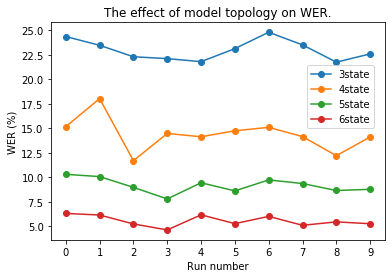

In [94]:
plt.plot(exptopo,marker='o', linestyle='-')
plt.legend(exptopo.columns,bbox_to_anchor=(0.75, 0.49))
plt.ylabel("WER (%)")
plt.xlabel("Run number")
plt.xticks(range(0,10))
plt.title("The effect of model topology on WER.")
plt.savefig("figures/topo.pdf")

## With or without Baum-Welch

In [61]:
results_hmm = load_obj("exp7_models_result")
hmm01=pd.DataFrame.from_dict(results_hmm)

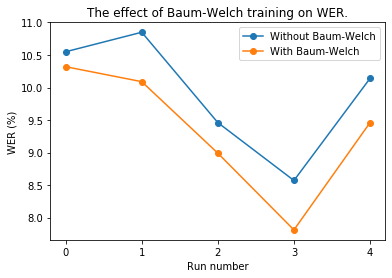

In [88]:
plt.plot(hmm01,marker='o', linestyle='-')
plt.legend(["Without Baum-Welch","With Baum-Welch"])#,bbox_to_anchor=(0.75, 0.49))
plt.ylabel("WER (%)")
plt.xlabel("Run number")
plt.xticks(range(0,5))
plt.title("The effect of Baum-Welch training on WER.")
plt.savefig("figures/baumwelch.pdf")

## Accoustic Features

In [78]:
results_fea = load_obj("exp8_features_result")

In [80]:
fea=pd.DataFrame.from_dict(results_fea);fea

,MFCC,MFCC_E,MFCC_E_D,MFCC_E_D_A
0,18.24,19.76,8.17,10.32
1,15.48,17.57,8.34,10.09
2,17.18,18.47,7.90,8.99


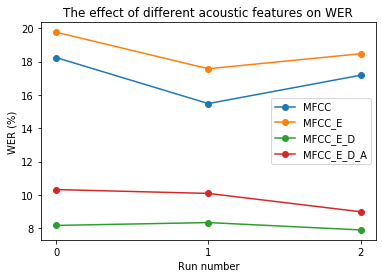

In [98]:
plt.plot(fea,marker='o', linestyle='-')
plt.legend(fea.columns)#,bbox_to_anchor=(0.75, 0.49))
plt.ylabel("WER (%)")
plt.xlabel("Run number")
plt.xticks(range(0,3))
plt.title("The effect of different acoustic features on WER")
plt.savefig("figures/featues.pdf")

## Pruning

In [119]:
pruning =load_obj("exp10_pruning_result");times=load_obj("exp10_pruning_times")
pruning=pd.DataFrame.from_dict(pruning);times=pd.DataFrame.from_dict(times)

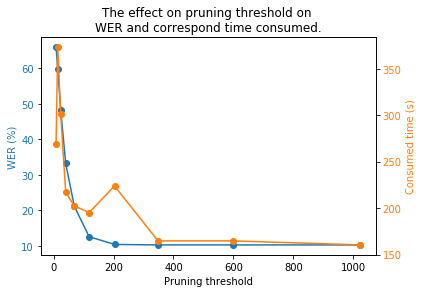

In [120]:
color = 'tab:blue'
fig,ax1=plt.subplots()
ax1.set_xlabel('Pruning threshold')
ax1.set_ylabel('WER (%)',color=color)
ax1.plot(pruning.iloc[0],marker='o', linestyle='-')
ax1.tick_params(axis='y',labelcolor=color)
color = 'tab:orange'
ax2 = ax1.twinx()
ax2.set_ylabel('Consumed time (s)',color=color)
ax2.plot(times.iloc[0],color=color,marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)
plt.title("The effect on pruning threshold on \nWER and correspond time consumed.")
plt.savefig("figures/pruning.pdf")

## WIP

In [121]:
results_wip = load_obj("exp6_wip_result")

In [146]:
wip=pd.DataFrame.from_dict(results_wip)

In [147]:
wip=wip.iloc[0];wip

-1000.000000     3.33
-964.827586      3.33
-929.655172      3.33
-894.482759      3.33
-859.310345      3.33
-824.137931      0.00
-788.965517      0.00
-753.793103      0.00
-718.620690      0.00
-683.448276      0.00
-648.275862      0.00
-613.103448      0.00
-577.931034      0.00
-542.758621      0.00
-507.586207      0.00
-472.413793      0.00
-437.241379      0.00
-402.068966      0.00
-366.896552      0.00
-331.724138      0.00
-296.551724      0.00
-261.379310      0.00
-226.206897      0.00
-191.034483      0.00
-155.862069      0.00
-120.689655      0.00
-85.517241       0.00
-50.344828       3.33
-15.172414      13.33
 20.000000      80.00
Name: 0, dtype: float64

In [154]:
wip=wip[:-1]

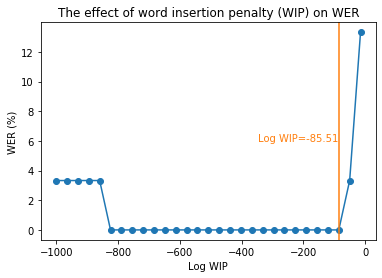

In [176]:
plt.plot(wip,marker='o')
plt.xlabel("Log WIP")
plt.ylabel("WER (%)")
x=-85.517241 
plt.axvline(x,color='tab:orange')
plt.text(x-260,6,s="Log WIP=-85.51 ",color='tab:orange')

plt.title("The effect of word insertion penalty (WIP) on WER")
plt.savefig("figures/WIP.pdf")